In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import dataset
df = pd.read_csv('health care diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


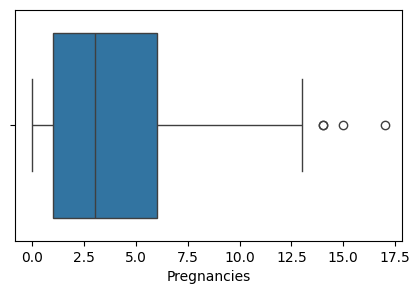

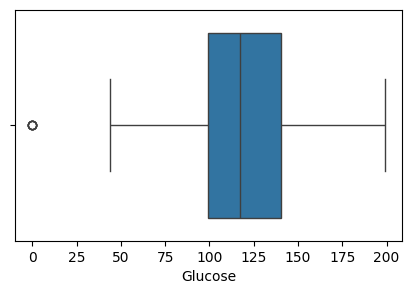

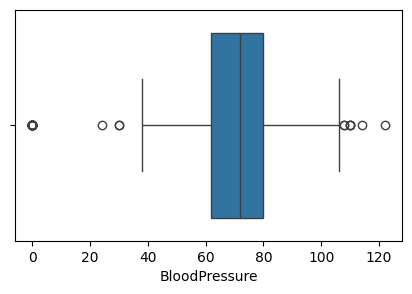

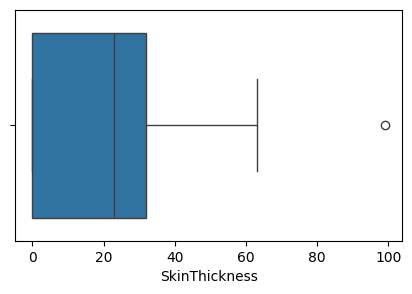

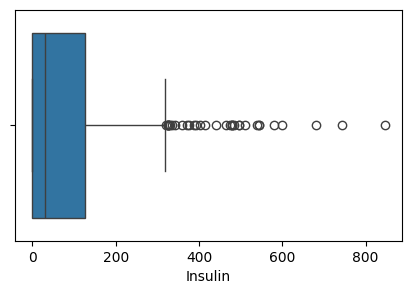

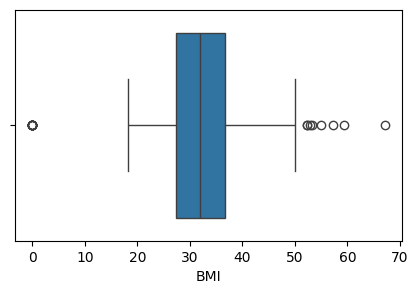

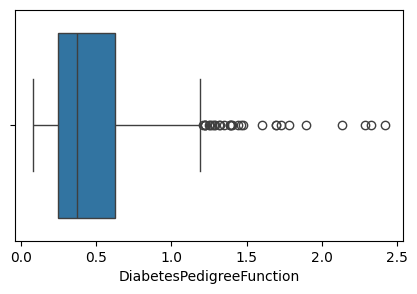

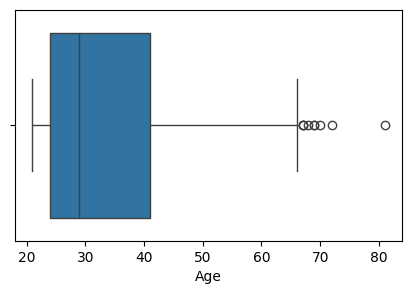

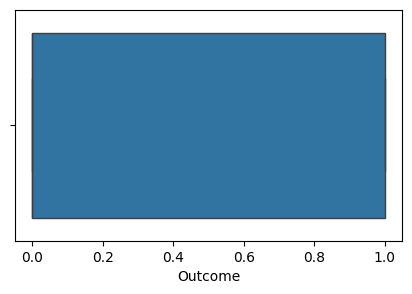

In [12]:
# outlier treatment
columns = df.columns
for column in columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x = df[column])
    plt.show()

In [20]:
df1 = df.copy()
df1.shape

(768, 9)

In [21]:
for i in columns:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    UB = q3+1.5*iqr
    LB = q1-1.5*iqr
    df1 = df1.drop(df1[df1[i]>UB].index)
    df1 = df1.drop(df1[df1[i]<LB].index)

In [22]:
df1.shape

(636, 9)

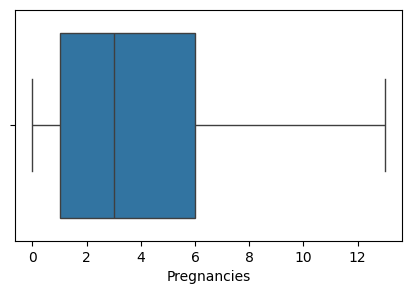

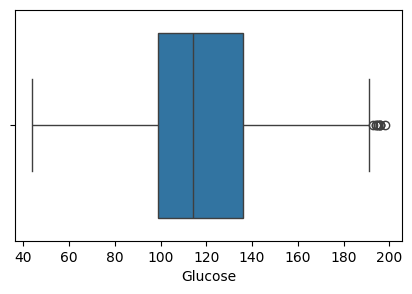

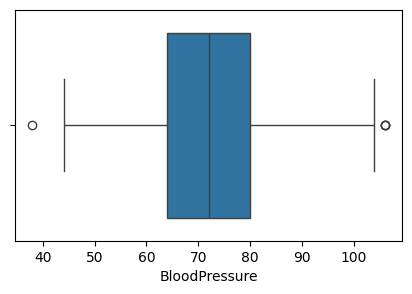

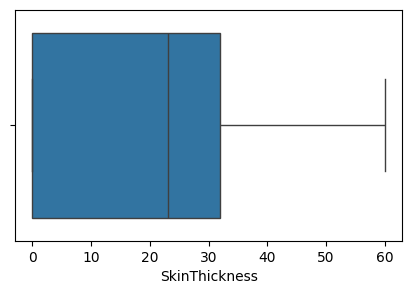

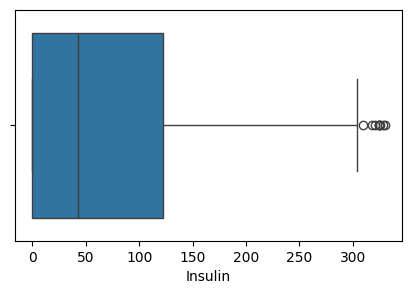

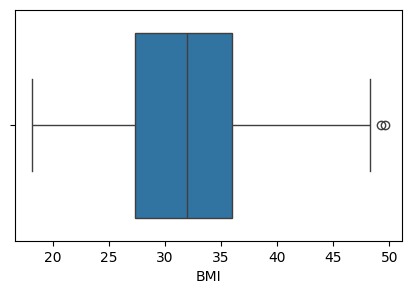

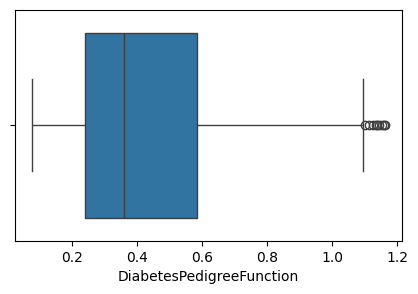

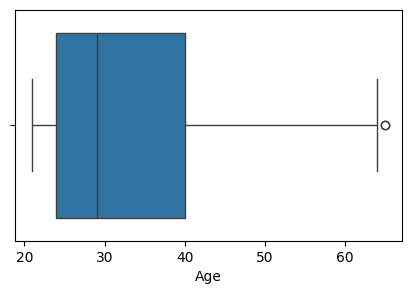

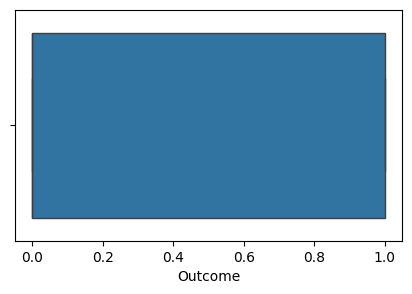

In [23]:
for column in columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df1[column])
    plt.show()

In [24]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [25]:
# Feature selection and How each feature is responsibe for outcome using statistical hypothesis testing

In [26]:
# Pregnancies
Pre_0 = df1[df1['Outcome']==0]['Pregnancies']
Pre_1 = df1[df1['Outcome']==1]['Pregnancies']

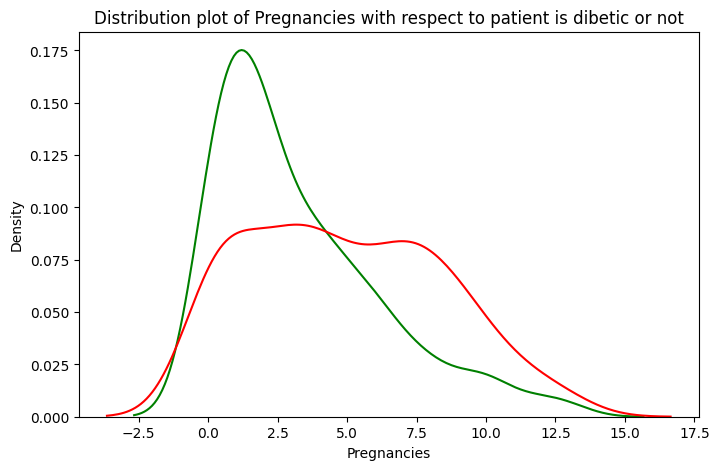

In [36]:
fig = plt.figure(figsize=(8,5))
sns.kdeplot(Pre_0,label='Not diabetic',color='green')
sns.kdeplot(Pre_1,label='diabetic',color='red')
plt.xlabel('Pregnancies')
plt.ylabel('Density')
plt.title('Distribution plot of Pregnancies with respect to patient is dibetic or not')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


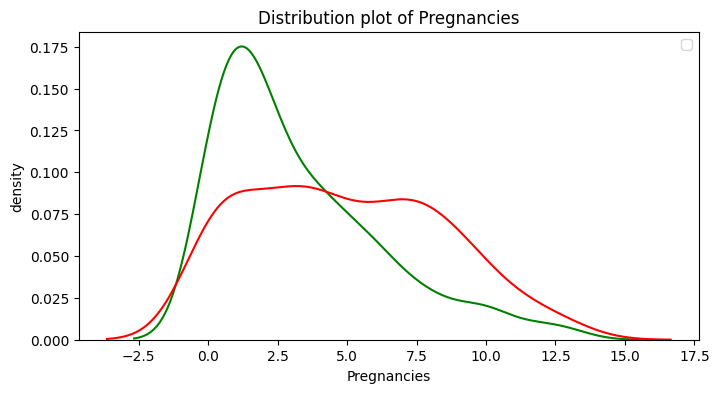

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-6.1049
Reject null hypothesis


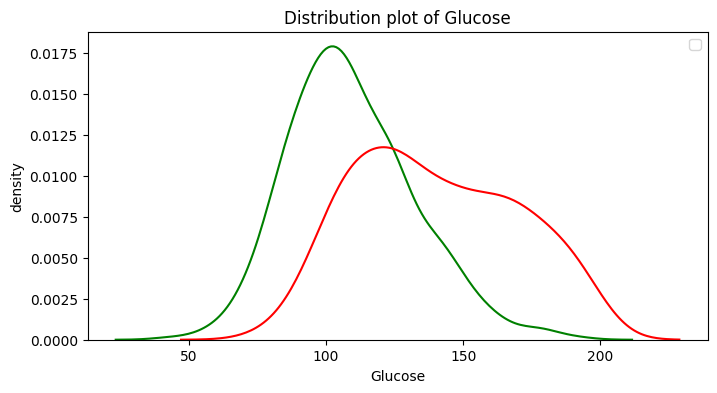

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-14.2814
Reject null hypothesis


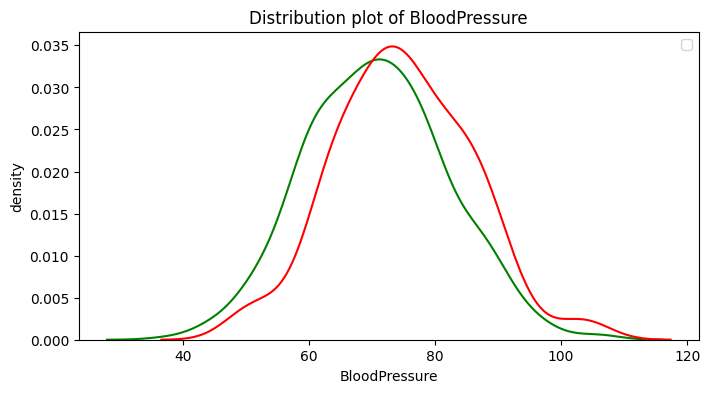

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-4.3747
Reject null hypothesis


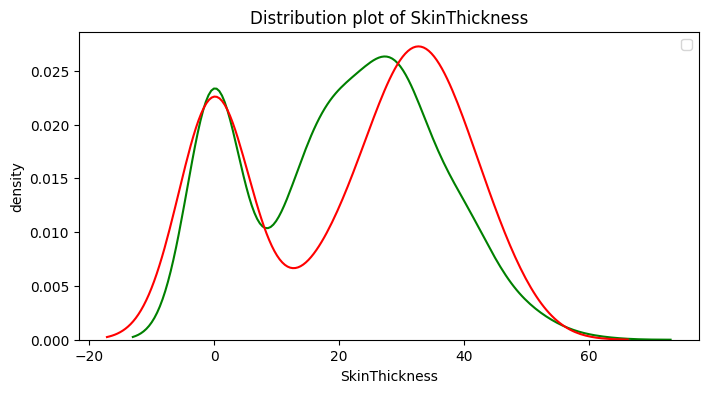

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.2846, calculated t_stat:-1.0708
Accept null hypothesis


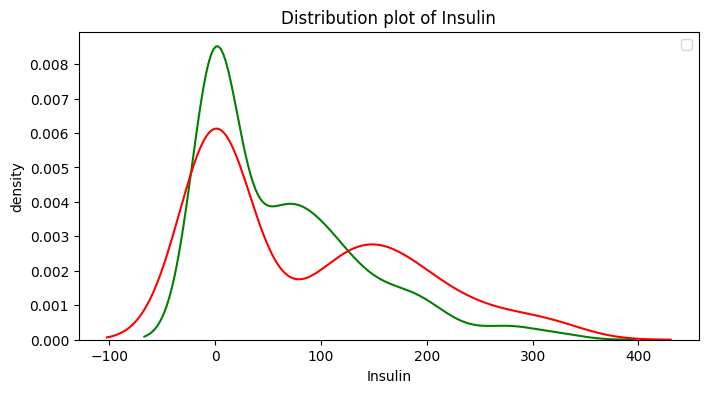

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0038, calculated t_stat:-2.9060
Reject null hypothesis


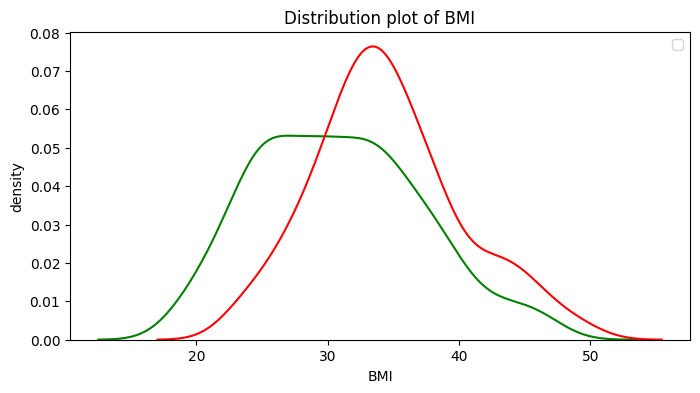

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-7.0118
Reject null hypothesis


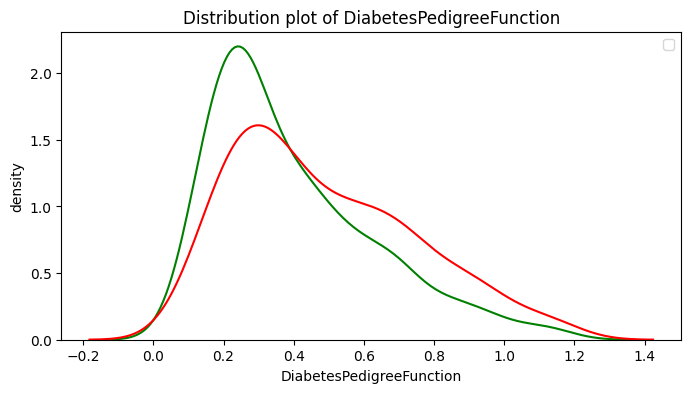

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-4.2941
Reject null hypothesis


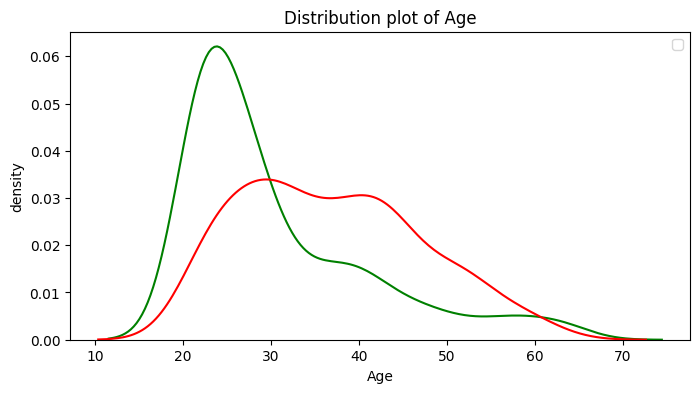

C:\Users\Admin\AppData\Local\Temp\ipykernel_15760\3048125028.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resp_0,color='green')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15760\3048125028.py:8: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(resp_1,color='red')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


calculated p_value: 0.0000, calculated t_stat:-6.9766
Reject null hypothesis


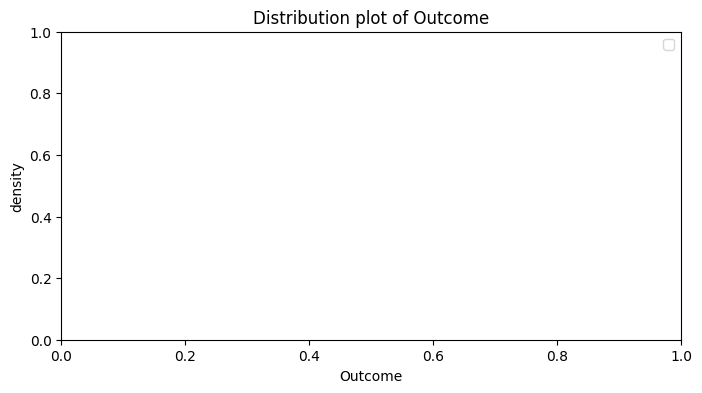

calculated p_value: 0.0000, calculated t_stat:-inf
Reject null hypothesis


f:\Data_Science_Project\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [41]:
from scipy import stats
for column in columns:
    resp_0 = df1[df1['Outcome']==0][column]
    resp_1 = df1[df1['Outcome']==1][column]
    
    fig= plt.figure(figsize=(8,4))
    sns.kdeplot(resp_0,color='green')
    sns.kdeplot(resp_1,color='red')
    plt.xlabel(column)
    plt.ylabel('density')
    plt.title('Distribution plot of' +" "+ column)
    plt.legend()
    plt.show()
    
    # Statistical analysis
    # degree of freedom and significance evel(alpha)
    dof = resp_0.shape[0]+resp_1.shape[0]-2
    alpha = 0.05
    t_stat, p_value = stats.ttest_ind(resp_0,resp_1)
    
    print(f'calculated p_value: {p_value:.4f}, calculated t_stat:{t_stat:.4f}')
    if p_value < 0.05:
        print('Reject null hypothesis')
    else:
        print('Accept null hypothesis')
    
    

# SkinThickness is not responsible for patient is diabetic or not

<Axes: >

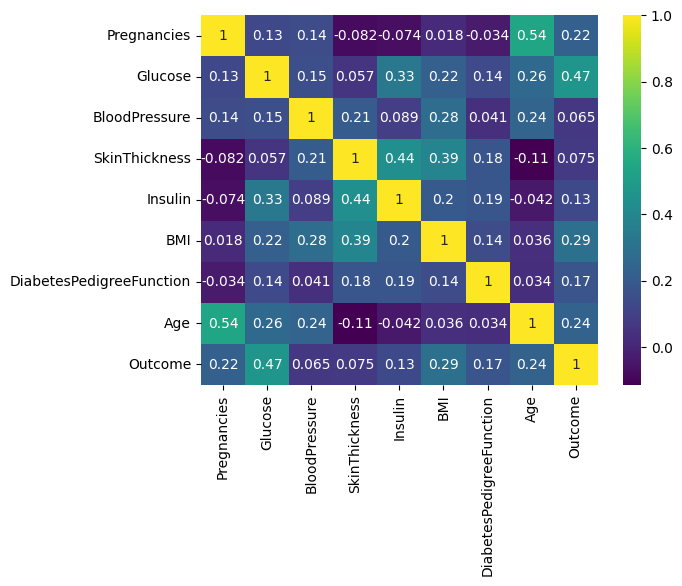

In [42]:
# correlation between all features
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# Glucose, BMI, Pregnanacies,Age, DiabetesPedigreeFunction, and Insulin are correlated with Outcome

In [47]:
# Make dependent and independent varible dataset
X = df1.drop(['SkinThickness','Outcome'],axis=1)
y = df1['Outcome']

In [48]:
X.shape

(636, 7)

In [51]:
# split data into train and test dataset
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [52]:
# data standardization / Normalization of feature values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
y_train = sc.transform(y_train)

# Model building

In [86]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [87]:
# model preparation
models = []
models.append(('LR',LogisticRegression(max_iter=1000)))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('RF',RandomForestClassifier()))

In [90]:
results = []
names = []
probs = []
aucs = []
cv_score = []
cm = []

In [91]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=10,shuffle=True)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    model.fit(X,y)
    
    # calculate predict probabilities 
    prob = model.predict_proba(X)[:,1]
    #print(prob)
    probs.append(prob)
    
    # calculate AUC
    auc = roc_auc_score(y,prob)
    aucs.append(auc)
    
    # confucion matrix
    model_cm = confusion_matrix(y,model.predict(X))
    cm.append(model_cm)
    # classification_report
    cls_report = classification_report(y,model.predict(X))
    
    # Model score based on cross_validation
    cv_scores = "%s: %f (%f)"% (model, cv_results.mean(), cv_results.std())
    cv_score.append(cv_results.mean())
    #calculate ROC_AUC curve data
    fpr, tpr, threshoulds = roc_curve(y,prob)
    
   
    # print model score
    print('cross validation score:\n',cv_scores)
    print('confusion matrix;\n',model_cm)
    print('classification report\n',cls_report)
    print('AUC:\n',auc)

cross validation score:
 LogisticRegression(max_iter=1000): 0.779911 (0.049884)
confusion matrix;
 [[400  39]
 [ 91 106]]
classification report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       439
           1       0.73      0.54      0.62       197

    accuracy                           0.80       636
   macro avg       0.77      0.72      0.74       636
weighted avg       0.79      0.80      0.79       636

AUC:
 0.8470566469710811
cross validation score:
 DecisionTreeClassifier(): 0.713790 (0.075281)
confusion matrix;
 [[439   0]
 [  0 197]]
classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       439
           1       1.00      1.00      1.00       197

    accuracy                           1.00       636
   macro avg       1.00      1.00      1.00       636
weighted avg       1.00      1.00      1.00       636

AUC:
 1.0
cross validation score:
 KNeig

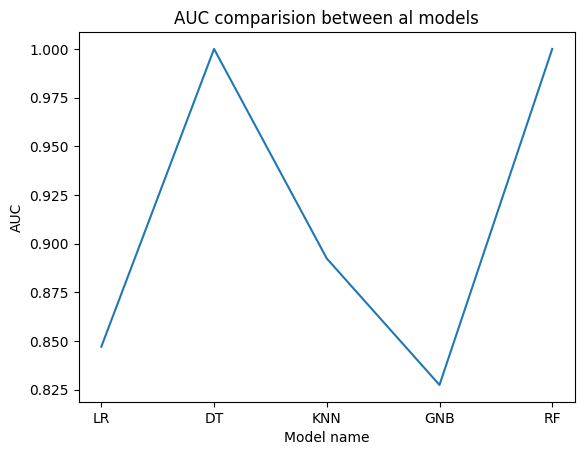

In [104]:
plt.plot(names,aucs)
plt.xlabel('Model name')
plt.ylabel('AUC')
plt.title('AUC comparision between al models')
plt.show()


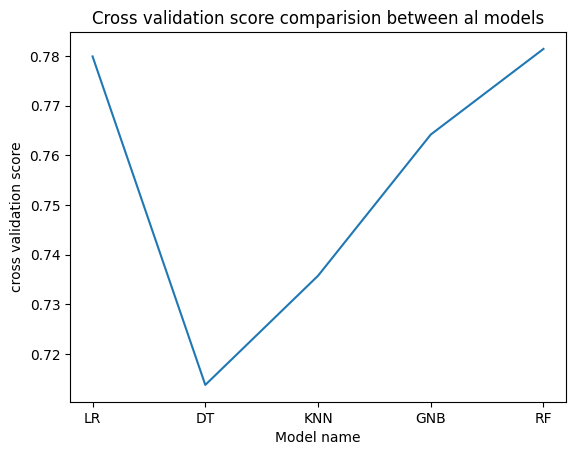

In [105]:
plt.plot(names,cv_score)
plt.xlabel('Model name')
plt.ylabel('cross validation score')
plt.title('Cross validation score comparision between al models')
plt.show()

# RandomForestclassifier is best one for classifying pateint is diabetic or not